In [2]:
import pandas as pd

df = pd.read_csv("cluster_label_for_dataset.csv")
print(df.columns)



Index(['Unnamed: 0.1', 'Unnamed: 0', 'lat', 'long', 'population', 'iso3_code',
       'corruption_perception_index', 'conflict_intensity', 'solar',
       'wind_speed', 'kmeans_label', 'weight', 'birch_label',
       'gaussian_label'],
      dtype='object')


In [3]:
df = df[['lat', 'long', 'population', 'iso3_code', 'solar', 'wind_speed', 'kmeans_label', 'birch_label', 'gaussian_label']]
print(df.columns)




Index(['lat', 'long', 'population', 'iso3_code', 'solar', 'wind_speed',
       'kmeans_label', 'birch_label', 'gaussian_label'],
      dtype='object')


In [4]:
import numpy as np

In [6]:

# get min and max of lat and long
minLat = df['lat'].min()
maxLat = df['lat'].max()
minLong = df['long'].min()
maxLong = df['long'].max()
print(minLat, maxLat, minLong, maxLong)
sortedDF = df.sort_values(by=['lat', 'long'])
# iterate through each row of sortedDF and print the row
latIdx = 0
lonIdx = 0



    # print(row['lat'], row['long'], row['population'], row['iso3_code'], row['solar'], row['wind_speed'], row['kmeans_label'], row['birch_label'], row['gaussian_label'])

-34.83333333333334 37.583333333333336 -17.583333333333343 63.5


In [12]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(0, 65535))
# sortedDF['solar'] = scaler.fit_transform(sortedDF[['solar']])
# print(sortedDF['solar'].min(), sortedDF['solar'].max())

0.0 65535.0


In [24]:
latDiff = 13.458333333333329 - 13.416666666666655
longDiff = 8.958333333333343 - 8.916666666666657
THRESHOLD = 0.0000001
def isPoint(latX, lonX, latY, lonY):
    if abs(latX - latY) <= THRESHOLD and abs(lonX - lonY) <= THRESHOLD:
        return True
    return False
arr = []
arrRow = []
lons = []
lats = []
idx = 0
maskedArr = []
maskedArrRow = []
from sklearn.preprocessing import MinMaxScaler

latIdx = 0
lonIdx = 0
sortedDF = df.sort_values(by=['lat', 'long'])
while minLong + lonIdx * longDiff < maxLong + THRESHOLD:
    lons.append(minLong + lonIdx * longDiff)
    lonIdx += 1
while minLat + latIdx * latDiff < maxLat + THRESHOLD:
    lats.append(minLat + latIdx * latDiff)
    latIdx += 1
lonIdx = 0
latIdx = 0
# scaler = MinMaxScaler(feature_range=(0, 65535))
# sortedDF['solar'] = scaler.fit_transform(sortedDF[['solar']])
# print(sortedDF['solar'].min(), sortedDF['solar'].max())
appendToLons = True
for index, row in sortedDF.iterrows():
    if idx % 100000 == 0:
        print(idx)
    idx += 1
    while not isPoint(minLat + latIdx * latDiff, minLong + lonIdx * longDiff, row['lat'], row['long']):
        
        arrRow.append(np.NaN)
        # arrRow.append(0)
        maskedArrRow.append(1)
        lonIdx += 1
        
        if minLong + lonIdx * longDiff > maxLong + THRESHOLD:
            appendToLons = False
            arr.append(arrRow)
            # arr.append(arrRow)
            maskedArr.append(maskedArrRow)
            arrRow = []
            maskedArrRow = []
            lonIdx = 0
            latIdx += 1
            
            if minLat + latIdx * latDiff > maxLat + THRESHOLD:
                print("ERR", minLat + latIdx * latDiff, maxLat, minLong + lonIdx * longDiff, maxLong)
                print(row)
                break
    
    arrRow.append(row['solar'])
    # arrRow.append(np.ushort(row['solar']))
    maskedArrRow.append(0)
    lonIdx += 1
    if minLong + lonIdx * longDiff > maxLong + THRESHOLD:
        arr.append(arrRow)
        maskedArr.append(maskedArrRow)
        arrRow = []
        maskedArrRow = []
        lonIdx = 0
        latIdx += 1
while len(arrRow) < len(arr[0]):
    arrRow.append(np.NaN)
    # arrRow.append(0)
    maskedArrRow.append(1)
arr.append(arrRow)
maskedArr.append(maskedArrRow)
finalArr = []
finalLats = []
finalLons = []
for i in range(0, len(lons), 2):
    finalLons.append(lons[i])

for i in range(0, len(lats), 2):
    finalArrRow = []
    finalLats.append(lats[i])
    for x in range(0, len(arr[i]), 2):
        finalArrRow.append(arr[i][x])
        # finalArr.append([arr[i][x], arr[i][x+1], arr[i+1][x], arr[i+1][x+1]])
        # finalLats.append(lats[i])
        # finalLons.append(lons[x])
    finalArr.append(finalArrRow)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [26]:
latIdx = 0
lonIdx = 0
while minLong + lonIdx * longDiff < maxLong + THRESHOLD:
    lons.append(minLong + lonIdx * longDiff)
    lonIdx += 1
while minLat + latIdx * latDiff < maxLat + THRESHOLD:
    lats.append(minLat + latIdx * latDiff)
    latIdx += 1

finalArr = []
finalLats = []
finalLons = []
for i in range(0, len(lons), 2):
    finalLons.append(lons[i])

for i in range(0, len(lats), 2):
    finalArrRow = []
    finalLats.append(lats[i])
    for x in range(0, len(arr[i]), 2):
        finalArrRow.append(arr[i][x])
        # finalArr.append([arr[i][x], arr[i][x+1], arr[i+1][x], arr[i+1][x+1]])
        # finalLats.append(lats[i])
        # finalLons.append(lons[x])
    finalArr.append(finalArrRow)

In [29]:
# import basemap
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

print(len(arr), len(arr[1]))
print(len(finalLons), len(finalLats), len(finalArr))
for i in range(len(arr)):
    if len(arr[i]) != 1947:
        print(i)
# np.ma.array([[0, 0, 1, 3, 4], [0, 1, 2, 3, 4]], mask=[[0, 0, 1, 0, 0], [0, 0, 0, 0, 0]], dtype=np.ushort)
# npGrid = np.ma.array(arr, mask=maskedArr, dtype=np.ushort)
npGrid = np.ma.masked_equal(np.array(arr), np.NaN)

1739 1947
974 870 870


[[-35, -18], [38, 64]]
974
870
1739
1947


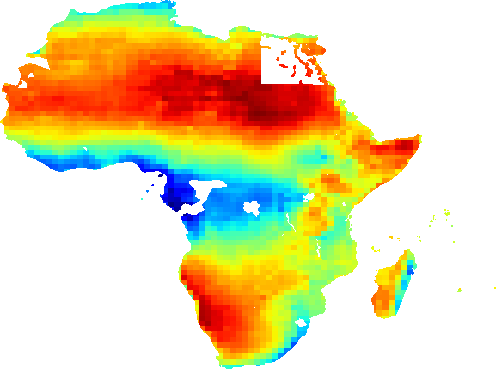

In [76]:
import math
import matplotlib as mpl
minLatFloor = math.floor(minLat)
minLongFloor = math.floor(minLong)
maxLatCeil = math.ceil(maxLat)
maxLongCeil = math.ceil(maxLong)
print(f"[[{minLatFloor}, {minLongFloor}], [{maxLatCeil}, {maxLongCeil}]]")
# m = Basemap(llcrnrlat=minLatFloor, urcrnrlat=maxLatCeil, llcrnrlon=minLongFloor, urcrnrlon=maxLongCeil, projection='merc', epsg=3857, ellps="WGS84")
# m = Basemap(llcrnrlat=minLatFloor, urcrnrlat=maxLatCeil, llcrnrlon=minLongFloor, urcrnrlon=maxLongCeil, epsg=3857)
m = Basemap(llcrnrlat=minLat, urcrnrlat=maxLat, llcrnrlon=minLong, urcrnrlon=maxLong, epsg=3857, fix_aspect=False, projection='merc', ellps="WGS84")
# m = Basemap(projection='merc')
# m = Basemap(epsg=3857, ellps="WGS84")
# m = Basemap(epsg=4326, ellps="WGS84")
# m = Basemap(llcrnrlat=minLat, urcrnrlat=maxLat, llcrnrlon=minLong, urcrnrlon=maxLong, epsg=4326)
# lons, lats, npGrid = getColorMeshData(df, 'cluster')
# draw a shaded-relief image

# m.drawcoastlines()
# m.drawcountries()
print(len(finalLons))
print(len(finalLats))
print(len(npGrid))
print(len(npGrid[0]))
lonsMesh, latsMesh = np.meshgrid(lons, lats)
plt.axis("off")
mpl.rcParams['savefig.pad_inches'] = 0
# plt.margins((0,0))
plt.gca().set_axis_off()
# plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            # hspace = 0, wspace = 0)
plt.margins(0,0)
# plt.autoscale(tight=True)
plt.rcParams["figure.autolayout"] = False
m.pcolormesh(lonsMesh, latsMesh, npGrid, latlon=True, cmap='jet', snap=False)
plt.savefig("output.png", dpi=500, bbox_inches='tight', pad_inches=0)
# mplleaflet.show()

In [77]:
# make all white transparent from output.png
from PIL import Image
img = Image.open("output.png")
img = img.convert("RGBA")
datas = img.getdata()
newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)
img.putdata(newData)
img.save("output1.png", "PNG")


In [ ]:
# import numpy as np
# from mpl_toolkits.basemap import Basemap
# # from data analytics
# def getColorMeshData(currDf, targetVar):
#     dfDict = dict()
#     # get unique latitudes and longitudes in df
#     for index, row in currDf.iterrows():
#         lat = row['lat']
#         lon = row['lon']
#         if lat not in dfDict:
#             dfDict[lat] = dict()
#         dfDict[lat][lon] = row[targetVar]


#     lat = float(-90)
#     lats = np.linspace(-90, 90, 180*2 + 1)
#     lons = np.linspace(-180, 180, 360*2 + 1)

#     arr = []
#     for lat in lats:
#         currRow = []
#         for lon in lons:
#             if lat in dfDict and lon in dfDict[lat]:
#                 # currRow.append(1)
#                 currRow.append(dfDict[lat][lon])
#             else:
#                 currRow.append(np.NaN)
#         arr.append(currRow)

#     return lons, lats, np.ma.masked_equal(np.array(arr), np.NaN)

# def draw_map():
#     m = Basemap()
#     lons, lats, npGrid = getColorMeshData(df, 'cluster')
#     # draw a shaded-relief image
#     m.drawcoastlines()
#     m.drawcountries()

#     lons, lats = np.meshgrid(lons, lats)
#     m.pcolormesh(lons, lats, npGrid, latlon=True, cmap='jet', snap=True)
#     plt.title("K-Means Clustering")
#     plt.colorbar(label=r'Clusters')